In [21]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")


# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
x = df.copy()
x = df.drop("loan_status", axis=1)

In [4]:
# Review the y variable Series
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [5]:
# Review the X variable DataFrame
x.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target values
y.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
print(x_train.shape)
print(x_test.shape)

(58152, 7)
(19384, 7)


---

## Create a Logistic Regression Model with the Original Data

In [11]:
# We built this function in class with my professor while working on week 20 day 2 activity 4 
def doClassification(model, x_train, x_test, y_train, y_test):
    # predict
    train_preds = model.predict(x_train)
    train_probs = model.predict_proba(x_train)

    test_preds = model.predict(x_test)
    test_probs = model.predict_proba(x_test)

    # evaluate train
    train_cr = classification_report(y_train, train_preds)
    train_cm = confusion_matrix(y_train, train_preds)

    train_report = f"""
    Train Confusion Matrix: 
    {train_cm}

    Train Report: 
    {train_cr}
    """
    print("TRAINING METRICS")
    print(train_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
    roc_auc = roc_auc_score(y_train, train_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TRAINING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    print()
    print()

    # evaluate test
    test_cr = classification_report(y_test, test_preds)
    test_cm = confusion_matrix(y_test, test_preds)

    test_report = f"""
    Test Confusion Matrix: 
    {test_cm}

    Test Report: 
    {test_cr}
    """
    print("TESTING METRICS")
    print(test_report)
    print()

    # train ROC curve
    # Compute fpr, tpr, thresholds and roc auc
    fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
    roc_auc = roc_auc_score(y_test, test_probs[:,1])

    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('TESTING Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [16]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
reg = LogisticRegression(random_state=1)


# Fit the model using training data
reg.fit(x_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [17]:
# Make a prediction using the testing data
train_preds = reg.predict(x_train)
train_probs = reg.predict_proba(x_train)

test_preds = reg.predict(x_test)
test_probs = reg.predict_proba(x_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

TRAINING METRICS

Train Confusion Matrix: 
[[55994   277]
 [  181  1700]]

Train Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.86      0.90      0.88      1881

    accuracy                           0.99     58152
   macro avg       0.93      0.95      0.94     58152
weighted avg       0.99      0.99      0.99     58152





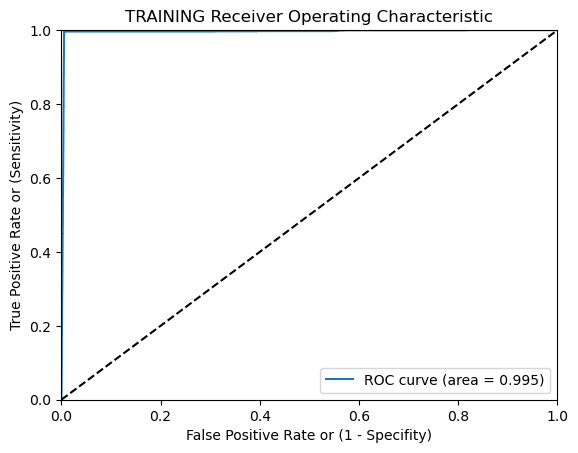



TESTING METRICS

Test Confusion Matrix: 
[[18663   102]
 [   56   563]]

Test Report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384





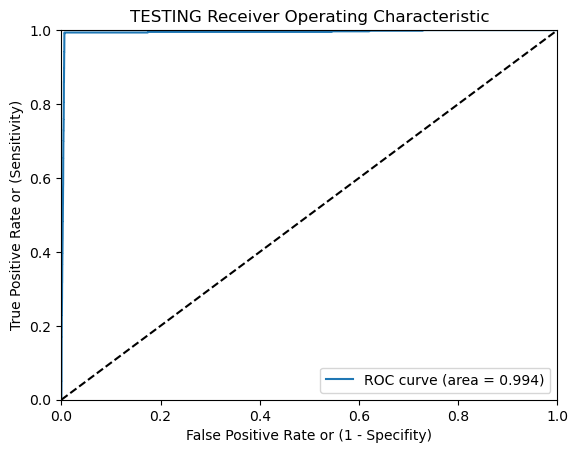

In [18]:
# Print the balanced_accuracy score of the model
# Generate a confusion matrix for the model
# Print the classification report for the model
train_cr = classification_report(y_train, train_preds)
train_cm = confusion_matrix(y_train, train_preds)

train_report = f"""
Train Confusion Matrix: 
{train_cm}

Train Report: 
{train_cr}
"""
print("TRAINING METRICS")
print(train_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_train, train_probs[:,1])
roc_auc = roc_auc_score(y_train, train_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TRAINING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print()
print()

# evaluate test
test_cr = classification_report(y_test, test_preds)
test_cm = confusion_matrix(y_test, test_preds)

test_report = f"""
Test Confusion Matrix: 
{test_cm}

Test Report: 
{test_cr}
"""
print("TESTING METRICS")
print(test_report)
print()

# train ROC curve
# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, test_probs[:,1])
roc_auc = roc_auc_score(y_test, test_probs[:,1])

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('TESTING Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression is not terrible, however, we would like false positives and false negatives to be lower.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [22]:
# # Assign a random_state parameter of 1 to the model
rand = RandomForestClassifier(random_state=1)

# Fit the original training data to the random_oversampler model
# Using Random Forest instead of random_oversampler
rand.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [23]:
# Make a prediction using the testing data
train_preds = rand.predict(x_train)
train_probs = rand.predict_proba(x_train)

test_preds = rand.predict(x_test)
test_probs = rand.predict_proba(x_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

TRAINING METRICS

    Train Confusion Matrix: 
    [[56155   116]
 [   27  1854]]

    Train Report: 
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     56271
           1       0.94      0.99      0.96      1881

    accuracy                           1.00     58152
   macro avg       0.97      0.99      0.98     58152
weighted avg       1.00      1.00      1.00     58152

    



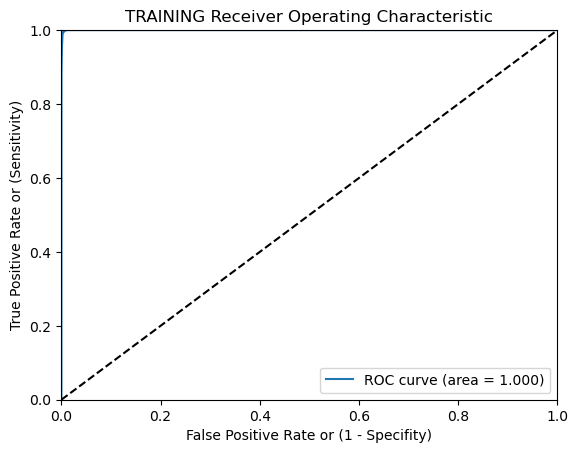



TESTING METRICS

    Test Confusion Matrix: 
    [[18666    99]
 [   66   553]]

    Test Report: 
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

    



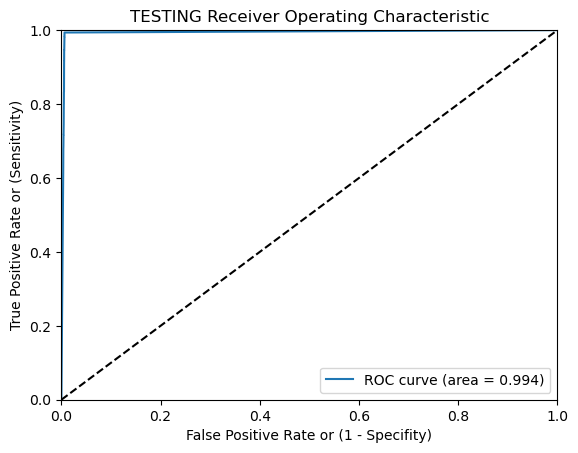

In [24]:
# Print the balanced_accuracy score of the model 
# Generate a confusion matrix for the model
# Print the classification report for the model
doClassification(rand, x_train, x_test, y_train, y_test)

### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Since the over sampled data is not something we had practiced in class, I used the random forest model instead. This model was almost the exact same, still needing a bit of help with false positives and negatives. It is actually slighly worse overall.